In [1]:
%matplotlib inline
import sys
sys.path.append('/home/paulo/git/bayeseg')
from datetime import datetime

from OceanPod import OceanPod
import os

wavfolder = '/run/media/paulo/Seagate Expansion Drive/Monitoramento INB/1_Pristina/1_Mai_Jun_2018/SD1/wav/'

In [2]:
op = OceanPod(wavfolder, file_format = '\d\d\d\d_\d\d_\d\d_\d\d_\d\d_\d\d', date_format = '%Y_%m_%d_%H_%M_%S')

In [3]:
data_minima = datetime(year = 2018, month = 4, day = 27, hour = 7)
data_maxima = datetime(year = 2018, month = 4, day = 27, hour = 10)

In [6]:
import time

inicio = time.time()
especs = op.get_spectrogram_filelist(data_minima = data_minima, data_maxima = data_maxima, by = 'hour', nwindow = 3, poverlap = 1/3, nfft = 1025)
fim = time.time()

print("Elapsed = {}".format(fim - inicio))

ValueError: nfft must be greater than or equal to nperseg.

In [5]:
especs[0].shape

(960001, 20)

In [7]:
import time

# Início 
data_inicio = datetime(year = 2018, month = 5, day = 1, hour = 0, minute = 0, second = 0)
duracao = 3 * 60
tdur = 1
toverlap = 0
nwindows_welch = 3
poverlap_welch = 0

inicio = time.time()
f, Pxx = op.get_spectrogram(data_inicio, duracao, tdur, nwindow_welch = nwindows_welch, poverlap_welch = poverlap_welch)
fim = time.time()

print("Elapsed = {}".format(fim - inicio))

32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 10666.0
32000 

In [8]:
Pxx.shape

(5334, 180)

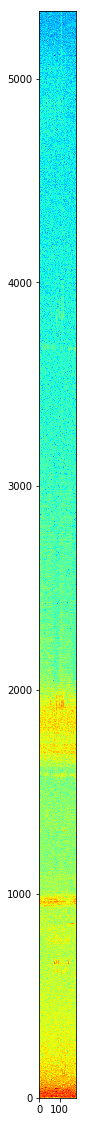

In [9]:
from matplotlib import pyplot as plt
import numpy as np

pxx = Pxx

#pxx_reduced = np.zeros((1000, 1440))
#count = 0

# spectrum is 16001 x 1440
# reduce 16001 -> 1200
#for row in pxx.T:
#    # discard DC freq
#    spec_line = row.copy()[1:]
    # decrement num of freq
    # sum up 12 values for each new spectrum
#    pxx_reduced[:,count] = spec_line.reshape(1000, 16).mean(axis=1)
#    count +=1

#print('reduce done')
#pxx_flipped = np.flip(pxx_reduced, 0)
#pxx_gained = pxx_reduced * ( 2 ** get_gain(sens, conv_factor))
#pxx_gained = pxx_reduced * ( 2 ** 2.0066)
pxx_gained = pxx * (2.0066 ** 2)

pxx_dB = 20 * np.log10(pxx_gained/2e-5)

fig, ax = plt.subplots(figsize = (40, 20))
im = ax.imshow(pxx_dB, origin='lower', cmap='jet', interpolation="none")